In [1]:
import numpy as np
import pandas as pd

pd.set_option('max_columns', 100)

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

In [5]:
from sklearn.feature_selection import VarianceThreshold

### Reading .csv file

In [3]:
raw = pd.read_csv('training_duplicated.csv')
raw.head()

,loss_216.208,loss_436.087,fragment_219.17,loss_14.896,loss_1026.581,loss_311.293,loss_381.095,loss_1175.592,loss_329.184,fragment_986.602,loss_781.47,loss_180.105,fragment_335.721,fragment_180.067,loss_1058.402,fragment_449.171,loss_1615.773,loss_178.194,loss_130.91,fragment_236.103,loss_906.289,loss_47.879,fragment_1568.772,fragment_396.736,fragment_1000.449,loss_1540.675,loss_504.128,loss_347.671,fragment_349.187,loss_455.133,fragment_756.149,loss_1351.715,fragment_363.049,loss_602.447,loss_318.19,loss_49.758,loss_191.186,loss_1274.632,loss_332.144,loss_77.043,loss_1085.602,fragment_1712.778,loss_538.231,loss_1194.518,fragment_594.439,loss_818.23,loss_587.124,loss_1029.526,loss_744.445,loss_1021.311,...,fragment_756.853,fragment_119.021,fragment_435.128,loss_467.274,fragment_1821.827,X2_MethylbutanoicAcid,AcacicAcid,Acetylglucosamine,Alanine,AminoAcid,Anthocyanidin,CaffeicAcid,pCoumaricAcid,CinnamicAcid,Cyclic_Monoterpene,Deoxyfuranose,DihydroFlavone,Dihydroflavonol,DiHydroxyPiperidineCarboxylicAcid,Echinocystic_LactoneBridge,OleanolicAcid,Flavan3ol,Flavonol,Flavone,Furanose,GallicAcid,Glucosamine,GlutamicAcid,Glutamine,HexopyranuronicAcid,HydroxyPiperidineCarboxylicAcid,Imidazole,L_Dopa,Leucine,Lysine,MetaMethoxyCinnamicAcid,MethoxyFerulicAcid,FerulicAcid,Monoterpene,Oleanolic_LactoneBridge,Phenolic,PipecolicAcid,Pyranose,Triterpene,FattyAcid,Tryptophan,Tyramine,Tyrosine,Xanthonoid,MQScore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.493507
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.491853
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.697186
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0.361187
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0.449019


In [4]:
raw.shape

(2041, 23448)

### Extracting features, labels, and confidence score

In [49]:
feature = raw.iloc[:,:23403]
feature.shape

(2041, 23403)

In [50]:
label = raw.iloc[:,23403:-1]
label.shape

(2041, 44)

In [51]:
confidence = raw.iloc[:,-1]
confidence.shape

(2041,)

### Distribution of features

In [52]:
n_unique = feature.nunique()

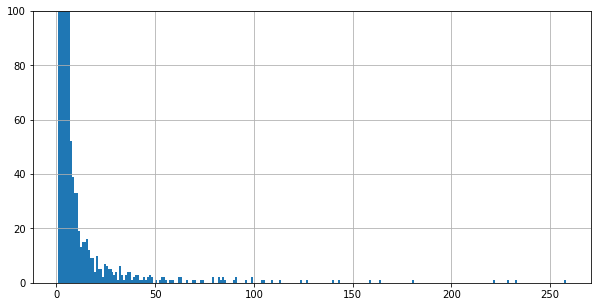

In [53]:
n_unique.hist(bins=n_unique.max()-n_unique.min()+1)
plt.ylim([0,100])
plt.show()

### Dropping invariant columns

In [65]:
vt = VarianceThreshold().fit(feature, label)

In [67]:
mat = vt.transform(feature)
mat.shape

(2041, 6215)

In [75]:
mask = vt.get_support()
mask.shape

(23403,)

In [83]:
newfeature = pd.DataFrame(mat, columns=feature.columns[mask])
newfeature.head()

,loss_436.087,loss_781.47,fragment_180.067,loss_178.194,fragment_236.103,loss_906.289,fragment_349.187,loss_455.133,fragment_756.149,loss_77.043,loss_587.124,loss_135.003,loss_354.085,loss_7.331,fragment_455.11,loss_119.091,fragment_632.407,loss_389.058,loss_530.167,loss_177.063,loss_45.023,fragment_663.152,loss_372.07,loss_372.06,loss_46.953,loss_186.065,loss_787.24,fragment_201.018,fragment_822.437,fragment_423.128,fragment_761.15,loss_414.06,loss_0.495,loss_252.042,loss_644.222,loss_300.082,loss_132.06,loss_132.08,fragment_153.014,loss_598.168,loss_316.12,fragment_302.06,fragment_599.389,loss_457.37,loss_543.135,fragment_568.539,loss_725.182,loss_474.154,loss_115.023,loss_482.085,...,loss_211.074,loss_957.29,loss_442.174,loss_657.111,loss_1023.321,loss_1055.757,loss_987.159,loss_12.027,loss_294.132,loss_58.0,fragment_929.502,loss_401.129,loss_611.228,fragment_161.063,fragment_459.107,loss_360.103,fragment_586.13,loss_374.067,loss_174.052,fragment_479.226,fragment_607.069,loss_225.057,fragment_229.077,loss_476.128,fragment_769.223,loss_614.208,fragment_573.406,fragment_587.102,loss_1414.358,loss_762.228,loss_578.187,loss_223.048,fragment_1074.561,loss_384.088,fragment_1044.042,loss_121.032,loss_472.151,loss_95.529,fragment_533.169,fragment_328.057,loss_12.01,loss_264.089,fragment_560.147,loss_268.089,loss_705.145,loss_1464.865,loss_302.121,loss_511.955,loss_103.017,fragment_435.128
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75803,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190886,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84846,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6524,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
newfeature.nunique().min()

2

### Write Data to CSV File

In [106]:
newraw = pd.concat([newfeature, label, confidence], axis=1)
newraw.head()

,loss_436.087,loss_781.47,fragment_180.067,loss_178.194,fragment_236.103,loss_906.289,fragment_349.187,loss_455.133,fragment_756.149,loss_77.043,loss_587.124,loss_135.003,loss_354.085,loss_7.331,fragment_455.11,loss_119.091,fragment_632.407,loss_389.058,loss_530.167,loss_177.063,loss_45.023,fragment_663.152,loss_372.07,loss_372.06,loss_46.953,loss_186.065,loss_787.24,fragment_201.018,fragment_822.437,fragment_423.128,fragment_761.15,loss_414.06,loss_0.495,loss_252.042,loss_644.222,loss_300.082,loss_132.06,loss_132.08,fragment_153.014,loss_598.168,loss_316.12,fragment_302.06,fragment_599.389,loss_457.37,loss_543.135,fragment_568.539,loss_725.182,loss_474.154,loss_115.023,loss_482.085,...,loss_1464.865,loss_302.121,loss_511.955,loss_103.017,fragment_435.128,X2_MethylbutanoicAcid,AcacicAcid,Acetylglucosamine,Alanine,AminoAcid,Anthocyanidin,CaffeicAcid,pCoumaricAcid,CinnamicAcid,Cyclic_Monoterpene,Deoxyfuranose,DihydroFlavone,Dihydroflavonol,DiHydroxyPiperidineCarboxylicAcid,Echinocystic_LactoneBridge,OleanolicAcid,Flavan3ol,Flavonol,Flavone,Furanose,GallicAcid,Glucosamine,GlutamicAcid,Glutamine,HexopyranuronicAcid,HydroxyPiperidineCarboxylicAcid,Imidazole,L_Dopa,Leucine,Lysine,MetaMethoxyCinnamicAcid,MethoxyFerulicAcid,FerulicAcid,Monoterpene,Oleanolic_LactoneBridge,Phenolic,PipecolicAcid,Pyranose,Triterpene,FattyAcid,Tryptophan,Tyramine,Tyrosine,Xanthonoid,MQScore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75803,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.493507
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190886,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.491853
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84846,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.697186
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0.361187
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6524,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0.449019


In [107]:
newraw.shape

(2041, 6260)

In [108]:
newraw.to_csv('training_dropped.csv', index=None)